<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/2348505_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necesssary libraries

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Importing the dataset

In [99]:
data = pd.read_csv("/content/Market_Basket_Optimisation (1).csv",header=None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


EXPLORATORY DATA ANALYSIS

In [100]:
data.head() #printing the first 5 rows

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


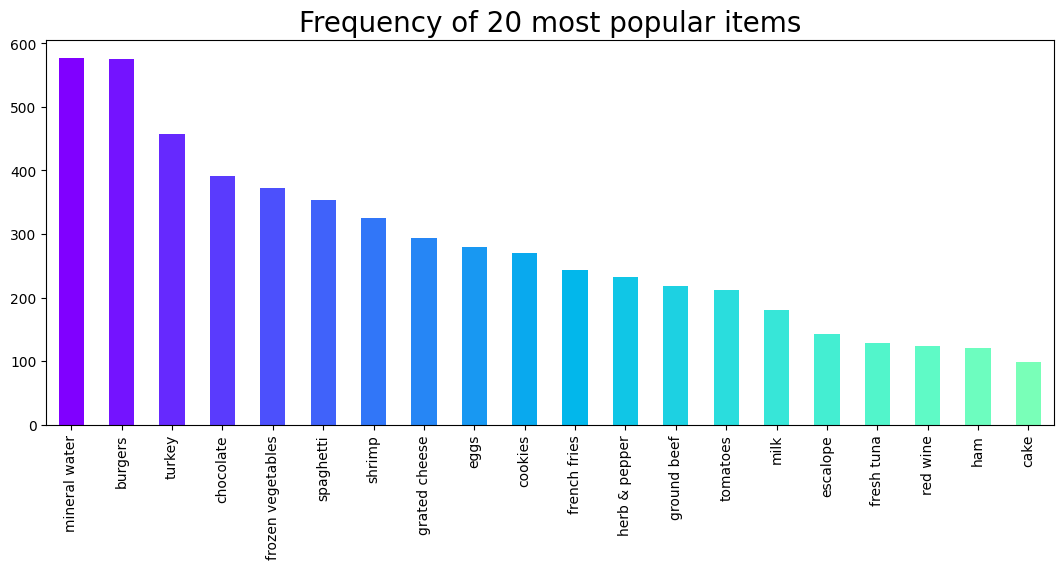

In [103]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(20).plot.bar(color = color, figsize=(13,5))
plt.title('Frequency of 20 most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.show()

DATA PREPARATIONS

In [104]:
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ONE- HOT ENCODER

In [105]:
from mlxtend.preprocessing import TransactionEncoder

# Call transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)
# One-hot encode transactions
onehot = encoder.transform(transactions)
# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)
# Print the one-hot encoded transaction dataset
onehot.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Association Rule Mining using Apriori Algorithm

In [162]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#popular itemsets pie chart
frequent_itemsets = apriori(onehot,min_support = 0.01,use_colnames=True)
rules = association_rules(frequent_itemsets,metric='lift',min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [107]:
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x))).astype("unicode")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [108]:
best_choice = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])
print('Best choice to buy items together')
print(best_choice[['antecedents', 'consequents', 'confidence','lift']])

Best choice to buy items together
                 antecedents              consequents  confidence      lift
343        eggs, ground beef            mineral water    0.506667  2.125563
378        ground beef, milk            mineral water    0.503030  2.110308
320   ground beef, chocolate            mineral water    0.473988  1.988472
366  frozen vegetables, milk            mineral water    0.468927  1.967236
273                     soup            mineral water    0.456464  1.914955
..                       ...                      ...         ...       ...
267            mineral water                 red wine    0.045861  1.630358
398            mineral water     olive oil, spaghetti    0.043065  1.878079
44             mineral water                  cereals    0.043065  1.673729
346            mineral water        eggs, ground beef    0.042506  2.125563
362            mineral water  spaghetti, french fries    0.042506  1.540263

[406 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
best_choice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 343 to 362
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         406 non-null    object 
 1   consequents         406 non-null    object 
 2   antecedent support  406 non-null    float64
 3   consequent support  406 non-null    float64
 4   support             406 non-null    float64
 5   confidence          406 non-null    float64
 6   lift                406 non-null    float64
 7   leverage            406 non-null    float64
 8   conviction          406 non-null    float64
 9   zhangs_metric       406 non-null    float64
dtypes: float64(8), object(2)
memory usage: 34.9+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [110]:
itemsets = []
a = best_choice['antecedents'].astype('string')
b = best_choice['consequents'].astype('string')
itemsets = a + "," + b

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
best_choice['itemsets'] = itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [112]:
itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


343          eggs, ground beef,mineral water
378          ground beef, milk,mineral water
320     ground beef, chocolate,mineral water
366    frozen vegetables, milk,mineral water
273                       soup,mineral water
                       ...                  
267                   mineral water,red wine
398       mineral water,olive oil, spaghetti
44                     mineral water,cereals
346          mineral water,eggs, ground beef
362    mineral water,spaghetti, french fries
Length: 406, dtype: string

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


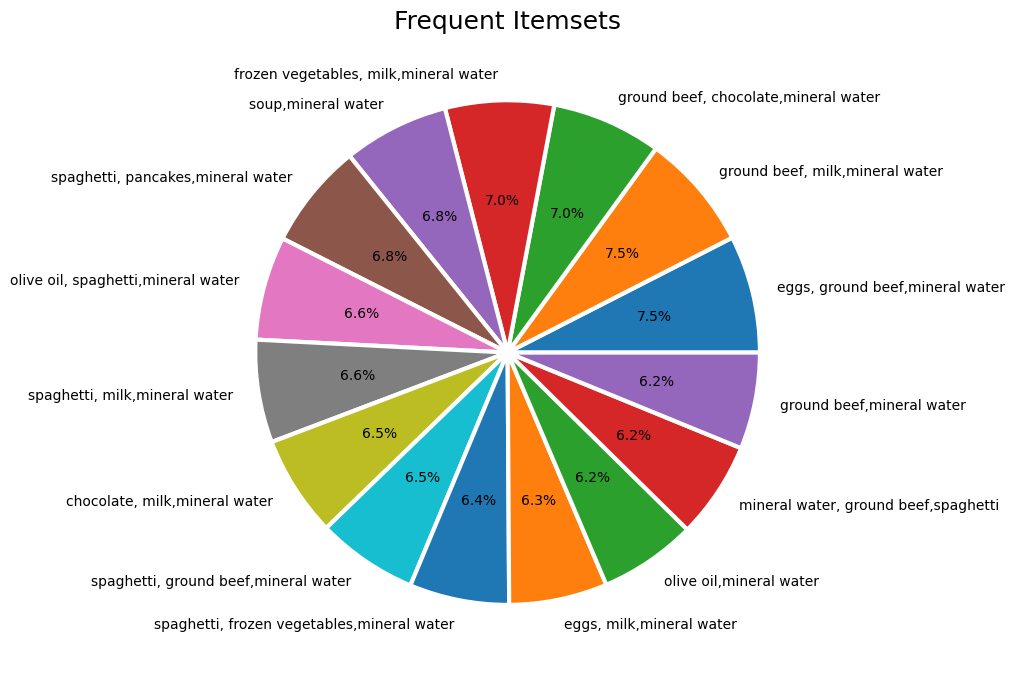

In [113]:
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(best_choice['confidence'].head(15),labels=best_choice['itemsets'].head(15), autopct= '%.1f%%',wedgeprops = {'linewidth':3.0,'edgecolor':'white'})
ax.set_title("Frequent Itemsets",fontsize = 18)
plt.tight_layout()
plt.show()

In [114]:
best_choice

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,itemsets
343,"eggs, ground beef",mineral water,0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342,"eggs, ground beef,mineral water"
378,"ground beef, milk",mineral water,0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969,"ground beef, milk,mineral water"
320,"ground beef, chocolate",mineral water,0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,0.508837,"ground beef, chocolate,mineral water"
366,"frozen vegetables, milk",mineral water,0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136,0.503555,"frozen vegetables, milk,mineral water"
273,soup,mineral water,0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221,"soup,mineral water"
...,...,...,...,...,...,...,...,...,...,...,...
267,mineral water,red wine,0.238368,0.028130,0.010932,0.045861,1.630358,0.004227,1.018584,0.507644,"mineral water,red wine"
398,mineral water,"olive oil, spaghetti",0.238368,0.022930,0.010265,0.043065,1.878079,0.004799,1.021041,0.613868,"mineral water,olive oil, spaghetti"
44,mineral water,cereals,0.238368,0.025730,0.010265,0.043065,1.673729,0.004132,1.018115,0.528512,"mineral water,cereals"
346,mineral water,"eggs, ground beef",0.238368,0.019997,0.010132,0.042506,2.125563,0.005365,1.023507,0.695266,"mineral water,eggs, ground beef"


In [131]:
rules['lhs'] = rules['antecedents'].apply(lambda x:len(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [135]:
rules['lhs'].mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10.69704433497537

In [146]:
pivot = rules[rules['lhs']>20].pivot_table(index='antecedents',columns='consequents',values='confidence',fill_value=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [125]:
best = best_choice.head(100)
pivot = best.pivot_table(index='antecedents',columns='consequents',values='confidence',fill_value=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
pivot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


consequents,chocolate,eggs,frozen vegetables,ground beef,milk,mineral water,olive oil,pancakes,spaghetti
antecedents,,,,,,,,,
"frozen vegetables, milk",0.000000,0.000000,0.000000,0.000000,0.000000,0.468927,0.000000,0.000000,0.000000
"ground beef, chocolate",0.000000,0.000000,0.000000,0.000000,0.000000,0.473988,0.000000,0.000000,0.000000
"mineral water, chocolate",0.000000,0.255696,0.000000,0.207595,0.265823,0.000000,0.000000,0.000000,0.301266
"mineral water, french fries",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300395
"mineral water, frozen vegetables",0.000000,0.000000,0.000000,0.000000,0.309701,0.000000,0.000000,0.000000,0.335821
"mineral water, ground beef",0.267101,0.247557,0.000000,0.000000,0.270358,0.000000,0.000000,0.000000,0.416938
"mineral water, pancakes",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339921
"mineral water, spaghetti",0.265625,0.238839,0.200893,0.285714,0.263393,0.000000,0.171875,0.191964,0.000000
"olive oil, mineral water",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.371981


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


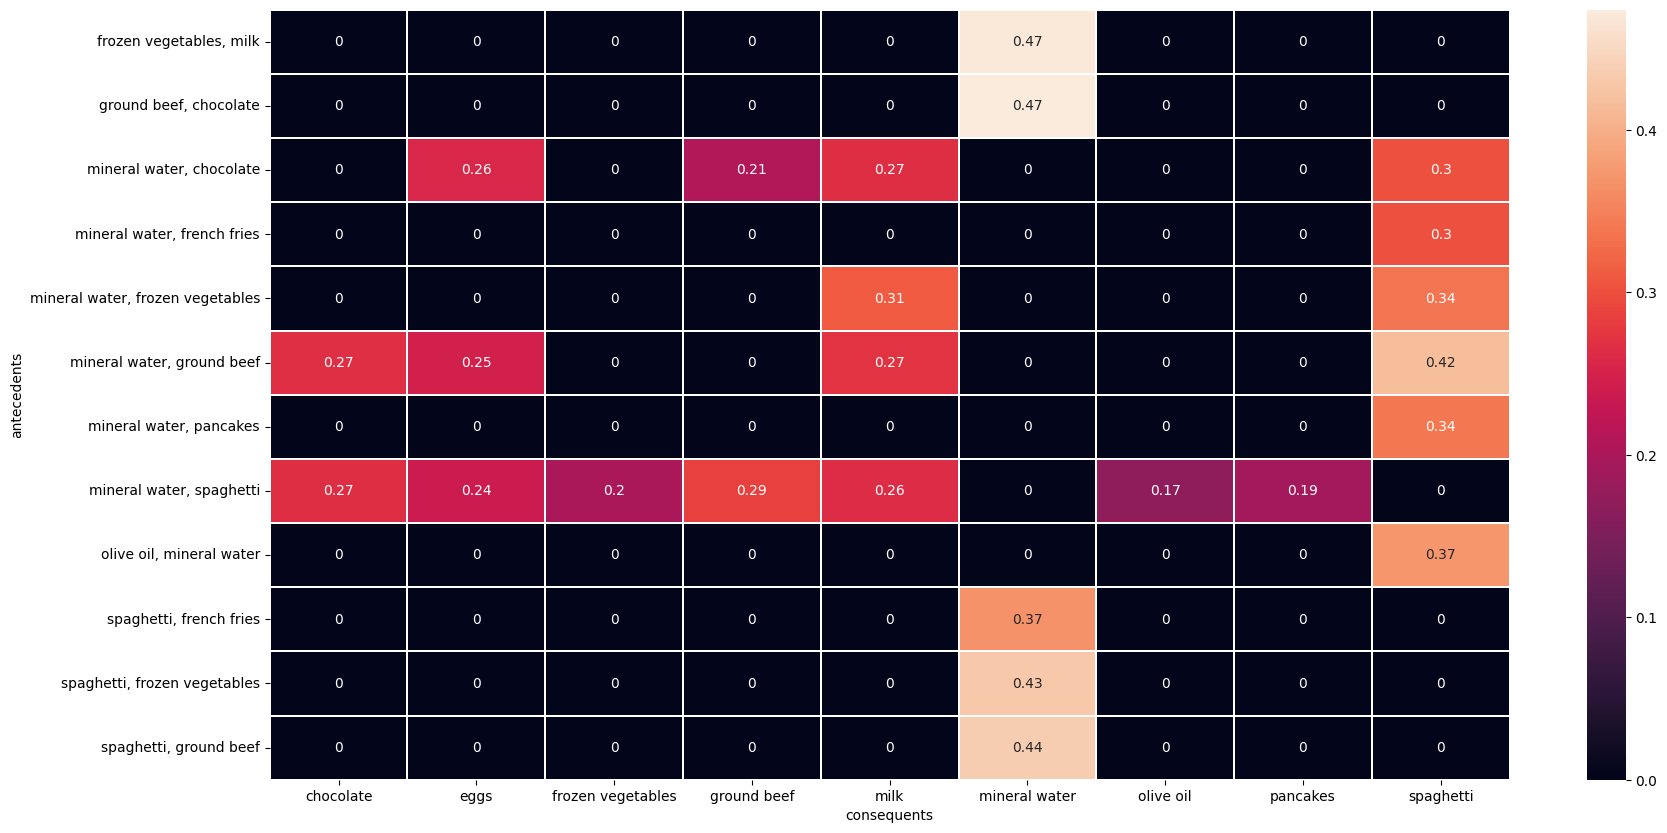

In [141]:
plt.figure(figsize=(20,10))
sns.heatmap(pivot,linewidths=0.3,annot=True)
plt.show()

In [142]:
for i in pivot.values:
  for j in i:
    if j > 0.30:
      pivot.replace(j,"Maximum Association",inplace=True)
    elif j < 0.20 and j != 0:
      pivot.replace(j,"Minimum Association",inplace=True)
    elif j == 0:
      pivot.replace(j,"No Association",inplace=True)
    else:
      pivot.replace(j,"Medium Association",inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CROSS-SELLING MATRIX STRATEGY

In [143]:
pivot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


consequents,chocolate,eggs,frozen vegetables,ground beef,milk,mineral water,olive oil,pancakes,spaghetti
antecedents,,,,,,,,,
"frozen vegetables, milk",No Association,No Association,No Association,No Association,No Association,Maximum Association,No Association,No Association,No Association
"ground beef, chocolate",No Association,No Association,No Association,No Association,No Association,Maximum Association,No Association,No Association,No Association
"mineral water, chocolate",No Association,Medium Association,No Association,Medium Association,Medium Association,No Association,No Association,No Association,Maximum Association
"mineral water, french fries",No Association,No Association,No Association,No Association,No Association,No Association,No Association,No Association,Maximum Association
"mineral water, frozen vegetables",No Association,No Association,No Association,No Association,Maximum Association,No Association,No Association,No Association,Maximum Association
"mineral water, ground beef",Medium Association,Medium Association,No Association,No Association,Medium Association,No Association,No Association,No Association,Maximum Association
"mineral water, pancakes",No Association,No Association,No Association,No Association,No Association,No Association,No Association,No Association,Maximum Association
"mineral water, spaghetti",Medium Association,Medium Association,Medium Association,Medium Association,Medium Association,No Association,Minimum Association,Minimum Association,No Association
"olive oil, mineral water",No Association,No Association,No Association,No Association,No Association,No Association,No Association,No Association,Maximum Association


In [163]:
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(mineral water, ground beef, milk)"
253,0.017064,"(mineral water, ground beef, spaghetti)"
254,0.015731,"(mineral water, milk, spaghetti)"
255,0.010265,"(olive oil, mineral water, spaghetti)"


In [165]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147,0.325896
1,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113,0.413630
2,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080,0.420238
3,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198,0.417434
4,(chocolate),(burgers),0.163845,0.087188,0.017064,0.104150,1.194537,0.002779,1.018933,0.194767
...,...,...,...,...,...,...,...,...,...,...
401,"(mineral water, spaghetti)",(pancakes),0.059725,0.095054,0.011465,0.191964,2.019529,0.005788,1.119933,0.536902
402,"(spaghetti, pancakes)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557,0.488452
403,(mineral water),"(spaghetti, pancakes)",0.238368,0.025197,0.011465,0.048098,1.908923,0.005459,1.024059,0.625163
404,(pancakes),"(mineral water, spaghetti)",0.095054,0.059725,0.011465,0.120617,2.019529,0.005788,1.069244,0.557862


In [167]:
bought = rules['antecedents']
buy = rules['consequents']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [168]:
new = list(zip(bought,buy))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [172]:
df = pd.DataFrame(new,columns=['Bought_Item',"Expected to be Bought"])
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Bought_Item,Expected to be Bought
0,(avocado),(mineral water)
1,(mineral water),(avocado)
2,(burgers),(cake)
3,(cake),(burgers)
4,(chocolate),(burgers)


In [173]:
from apyori import apriori
model = apriori(itemsets,min_support=0.003,min_confidence=0.2,min_lift=3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
results = list(model)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


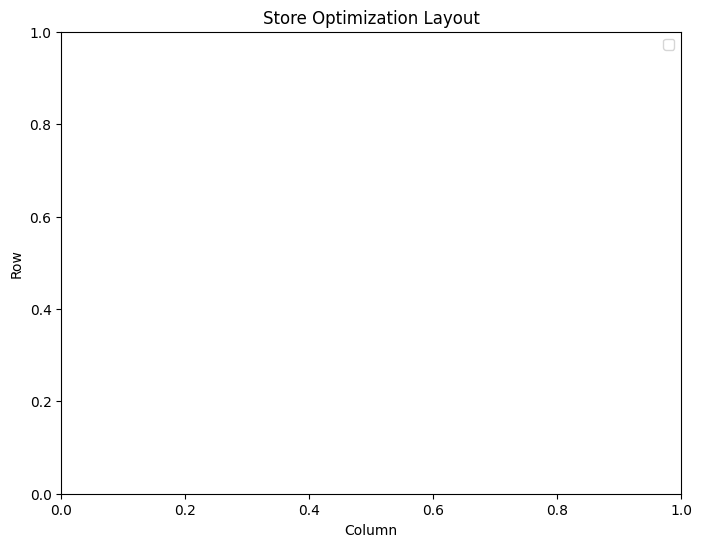

In [149]:

# Create a color palette
palette = sns.color_palette("Set1", n_colors=len(itemsets))

# Create a plot
plt.figure(figsize=(8, 6))
for row, section in enumerate(pivot):
    for col, section_id in enumerate(section):
        items = itemsets.get(section_id, [])
        for idx, item in enumerate(items):
            plt.scatter(col, -row, color=palette[idx], label=itemsets)

# Customize the plot
plt.title("Store Optimization Layout")
plt.xlabel("Column")
plt.ylabel("Row")
plt.legend()

# Show the plot
plt.show()